# Euros Exchange Rate
### This project main objective is to apply my knowledge in producing graphs in python via the usage of matplotlibs.

## About the dataset
This dataset is compiled by Daria Chemkaeva from the European Central Bank.

It tracks the daily exchange rate of the Euro against the US Dollar over the periods 1999-2021.

An exchange rate of 1.5 signifies that 1 Euro is able to be exchanged for 1.5USD.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Reading in the dataset
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [3]:
# Initial exploration
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [4]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [5]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

Upon inital inspection, there are some data cleaning that we need to do.

Firstly, the column names need to change to a more python friendly format.

Some currencies have a lot of missing data. The most worrying currencies with the largest missing data are the Greek Drachma, Slovak Koruna, Solvenian Tolar, Maltese Lira Latvian Lats, Iceland Krona, Estonian Kroon and Cypriot Pound.

It would be beneficial if we could determine if these missing values could be missing at random or not.

E.G. Greek data might be missing due to solely Greecen adopting the Euros as their main currency.

All the currencys are stored as an object (most likley string). These data can be converted to a float/int to make latter analysis easier.

Period can be converted to a datetime object.

There are 40 different currencies and a full dataset has 5699 recorded values.

In [6]:
# Cleaning column names
# Create loop to create a map between the current column names and its clean counterpart
clean_cols = {}
for i in exchange_rates.columns:
    if i == 'Period\\Unit:':
        clean_cols[i] = 'time'
    else:
        clean_name = i.replace('[', '')
        clean_name = clean_name.replace(' ]', '')
        clean_name = clean_name.replace(' ', '_')
        clean_name = clean_name.lower()
        clean_cols[i] = clean_name

exchange_rates.rename(columns = clean_cols, inplace = True)

In [7]:
exchange_rates.head()

,time,australian_dollar,bulgarian_lev,brazilian_real,canadian_dollar,swiss_franc,chinese_yuan_renminbi,cypriot_pound,czech_koruna,danish_krone,...,romanian_leu,russian_rouble,swedish_krona,singapore_dollar,slovenian_tolar,slovak_koruna,thai_baht,turkish_lira,us_dollar,south_african_rand
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [8]:
# Convert time period into datetime object
exchange_rates['time'] = pd.to_datetime(exchange_rates['time'])

# Sorting dataset in time order
exchange_rates.sort_values('time', inplace = True)
exchange_rates.reset_index(drop = True, inplace = True)

In [9]:
# After trying out several loops, there seems to be an entry of '-' as well
# I need to convert this into a null value
# I also converted the data to float
for i in exchange_rates.columns:
    if i != 'time':
        boolean = exchange_rates[i].astype('str')=='-'
        exchange_rates.loc[boolean,i] = np.nan
        exchange_rates[i] = exchange_rates[i].astype('float')

In [10]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   time                   5699 non-null   datetime64[ns]
 1   australian_dollar      5637 non-null   float64       
 2   bulgarian_lev          5239 non-null   float64       
 3   brazilian_real         5370 non-null   float64       
 4   canadian_dollar        5637 non-null   float64       
 5   swiss_franc            5637 non-null   float64       
 6   chinese_yuan_renminbi  5370 non-null   float64       
 7   cypriot_pound          2304 non-null   float64       
 8   czech_koruna           5637 non-null   float64       
 9   danish_krone           5637 non-null   float64       
 10  estonian_kroon         3074 non-null   float64       
 11  uk_pound_sterling      5637 non-null   float64       
 12  greek_drachma          514 non-null    float64       
 13  hon

For this project, I am only going to focus on Euros vs USD

In [11]:
euro_to_gbp = exchange_rates[['time','uk_pound_sterling']].copy()
euro_to_gbp = euro_to_gbp[(euro_to_gbp['uk_pound_sterling'].astype('str') != 'nan')]

In [12]:
# Deeper exploration into US Dollar
euro_to_gbp['uk_pound_sterling'].value_counts()

0.68880    7
0.63040    7
0.67930    7
0.87750    7
0.90430    7
          ..
0.81915    1
0.74810    1
0.64640    1
0.78280    1
0.62500    1
Name: uk_pound_sterling, Length: 3469, dtype: int64

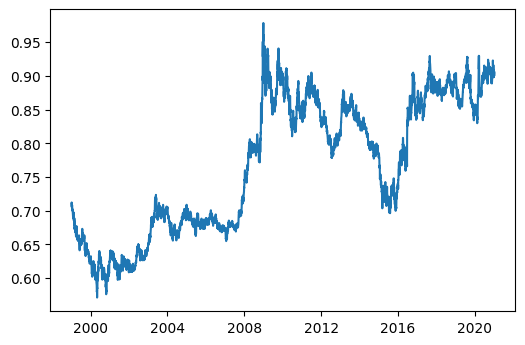

In [13]:
# Visual exploration
%matplotlib inline

plt.plot(euro_to_gbp['time'],euro_to_gbp['uk_pound_sterling'])
plt.show()

The line chart is very jagged due to large variations on a daily basis so I want to try looking at a moving average chart instead.

In [158]:
euro_to_gbp['ma_30'] = euro_to_gbp['uk_pound_sterling'].rolling(30).mean()

# Calculating the change in exchange rate
euro_to_gbp['change'] = euro_to_gbp['uk_pound_sterling'].diff()

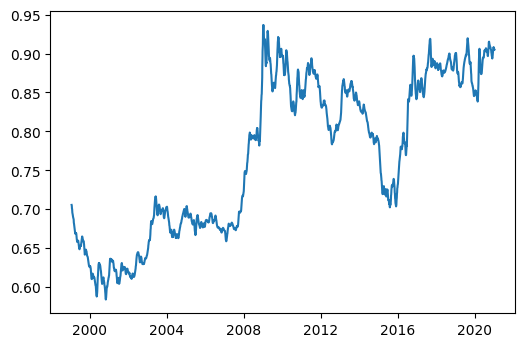

In [15]:
plt.plot(euro_to_gbp['time'], euro_to_gbp['ma_30'])
plt.show()

In particular, I want to have a look at how brexit had its effects on the rate of euro against the british pounds.

Key dates:

23 June 2016 - Referendum vote held where majority voted for leave

29 March 2017 - Article 50 invoked

20 March 2019 - Extension requested which was granted the next day

10 April 2019 - Further extension requested and granted

28 October 2019 - Further extension requested and granted

31 December 2020 - Left the EU

In [42]:
# I want the time series to begin from 2016
euro_to_gbp_2016 = euro_to_gbp[euro_to_gbp['time'].dt.year>=2016]

In [43]:
euro_to_gbp_2016.head()

,time,uk_pound_sterling,ma_30,change
4415,2016-01-04,0.73810,0.731590,0.001150
4416,2016-01-05,0.73235,0.732253,0.000569
4417,2016-01-06,0.73440,0.732813,0.000455
4418,2016-01-07,0.74545,0.734163,0.000925
4419,2016-01-08,0.74519,0.735289,0.001219


In [44]:
euro_to_gbp_2016.tail()

,time,uk_pound_sterling,ma_30,change
5694,2021-01-04,0.90160,0.906341,0.000110
5695,2021-01-05,0.90333,0.905033,-0.000495
5696,2021-01-06,0.90635,0.904990,-0.000975
5697,2021-01-07,0.90190,0.904587,-0.000958
5698,2021-01-08,0.90128,0.904705,-0.000572


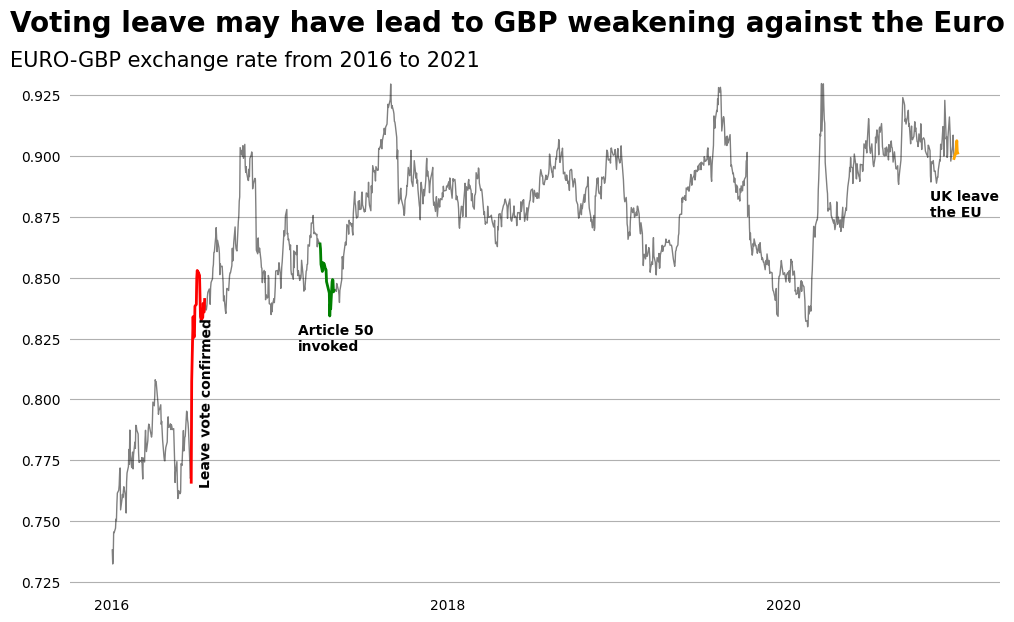

In [232]:
# Using boolean indexing to isolate the dates of interest
first_lock = (euro_to_gbp_2016['time'] >= dt.datetime(2016, 6, 23))&(euro_to_gbp_2016['time'] <= dt.datetime(2016, 7, 23))
extension_lock = (euro_to_gbp_2016['time'] >= dt.datetime(2017, 3, 29))&(euro_to_gbp_2016['time'] <= dt.datetime(2017, 4, 29))
second_lock = (euro_to_gbp_2016['time'] >= dt.datetime(2020, 12, 31))&(euro_to_gbp_2016['time'] <= dt.datetime(2021, 1, 8))

(fig), ax = plt.subplots(figsize = (12,7))

# Enabling grid so graph is easier to read
ax.grid(b = True)

# Plotting initial line graph
ax.plot(euro_to_gbp_2016['time'], euro_to_gbp_2016['uk_pound_sterling'], linewidth = 1, c = 'black', alpha = 0.5)

# Using principle of colour to substantiate the time periods of interest
ax.plot(euro_to_gbp_2016.loc[first_lock, 'time'], euro_to_gbp_2016.loc[first_lock, 'uk_pound_sterling'], c = 'red', linewidth = 2)
ax.plot(euro_to_gbp_2016.loc[extension_lock, 'time'], euro_to_gbp_2016.loc[extension_lock, 'uk_pound_sterling'], c = 'green', linewidth = 2)
ax.plot(euro_to_gbp_2016.loc[second_lock, 'time'], euro_to_gbp_2016.loc[second_lock, 'uk_pound_sterling'], c = 'orange', linewidth = 2)

# Removing unnecessary ink to increase data ink ratio
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(bottom=0, left=0)

ax.set_xticks([])
fig.text(0.145, 0.095, '2016')
fig.text(0.425, 0.095, '2018')
fig.text(0.705, 0.095, '2020')

ax.text(dt.datetime(2016,7,10), 0.765, 'Leave vote confirmed', rotation = 89.5, weight = 'bold')
ax.text(dt.datetime(2020,11,10), 0.875, 'UK leave \nthe EU', weight = 'bold')
ax.text(dt.datetime(2017,2,10), 0.82, 'Article 50 \ninvoked', weight = 'bold')

fig.text(0.075, 0.92, 'Voting leave may have lead to GBP weakening against the Euro', size = 20, weight = 'bold')
fig.text(0.075, 0.87, 'EURO-GBP exchange rate from 2016 to 2021', size = 15)

plt.show()

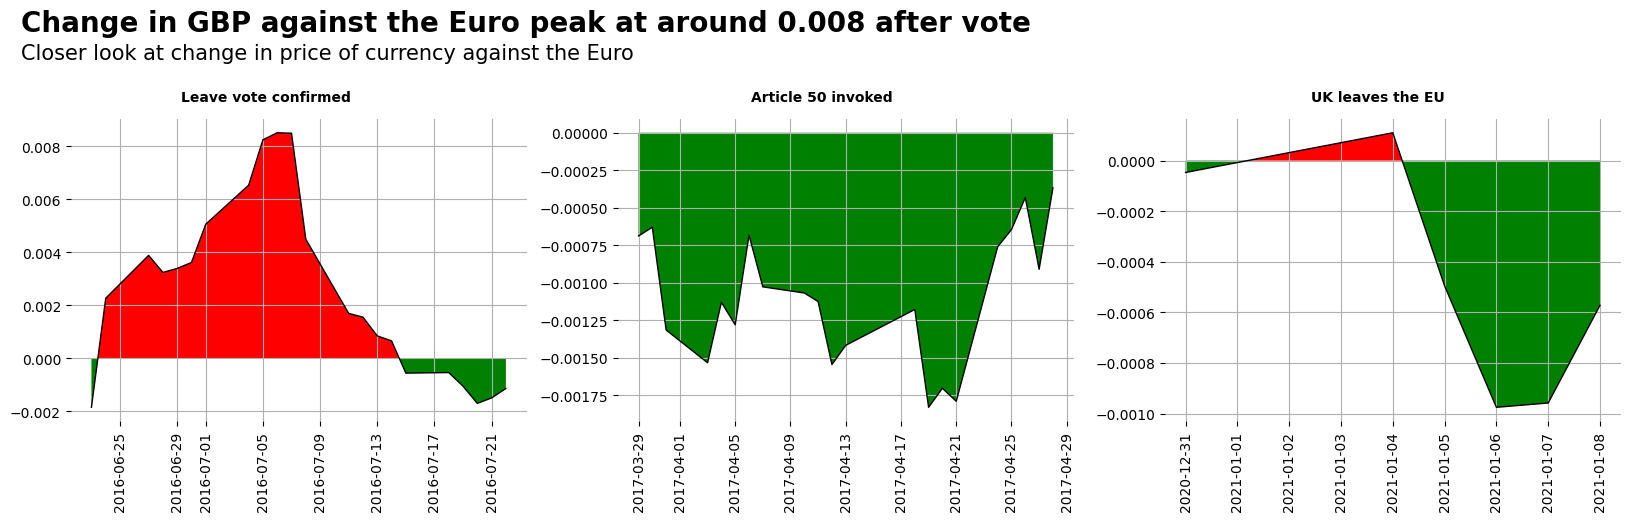

In [229]:
(fig2), (ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,4))
axes = [ax2, ax3, ax4]

for i in axes:
    i.grid(b=True)
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.spines['bottom'].set_visible(False)
    
# 2nd Axes

ax2.plot(euro_to_gbp_2016.loc[first_lock, 'time'], euro_to_gbp_2016.loc[first_lock, 'change'], c = 'black', linewidth = 1)

ax2.tick_params(axis = 'x', labelrotation = 90)

ax2.fill_between(euro_to_gbp_2016.loc[first_lock, 'time'], euro_to_gbp_2016.loc[first_lock, 'change'], 0, where=0 >= euro_to_gbp_2016.loc[first_lock, 'change'],facecolor='green', interpolate=True)
ax2.fill_between(euro_to_gbp_2016.loc[first_lock, 'time'], euro_to_gbp_2016.loc[first_lock, 'change'], 0, where=0 <= euro_to_gbp_2016.loc[first_lock, 'change'],facecolor='red', interpolate=True)

# 3rd Axes

ax3.plot(euro_to_gbp_2016.loc[extension_lock, 'time'], euro_to_gbp_2016.loc[extension_lock, 'change'], c = 'black', linewidth = 1)

ax3.tick_params(axis = 'x', labelrotation = 90)

ax3.fill_between(euro_to_gbp_2016.loc[extension_lock, 'time'], euro_to_gbp_2016.loc[extension_lock, 'change'], 0, where=0 >= euro_to_gbp_2016.loc[extension_lock, 'change'],facecolor='green', interpolate=True)
ax3.fill_between(euro_to_gbp_2016.loc[extension_lock, 'time'], euro_to_gbp_2016.loc[extension_lock, 'change'], 0, where=0 <= euro_to_gbp_2016.loc[extension_lock, 'change'],facecolor='red', interpolate=True)

# 4th Axes

ax4.plot(euro_to_gbp_2016.loc[second_lock, 'time'], euro_to_gbp_2016.loc[second_lock, 'change'], c = 'black', linewidth = 1)

ax4.tick_params(axis = 'x', labelrotation = 90)

ax4.fill_between(euro_to_gbp_2016.loc[second_lock, 'time'], euro_to_gbp_2016.loc[second_lock, 'change'], 0, where=0 >= euro_to_gbp_2016.loc[second_lock, 'change'],facecolor='green', interpolate=True)
ax4.fill_between(euro_to_gbp_2016.loc[second_lock, 'time'], euro_to_gbp_2016.loc[second_lock, 'change'], 0, where=0 <= euro_to_gbp_2016.loc[second_lock, 'change'],facecolor='red', interpolate=True)

fig2.text(0.18, 0.925,'Leave vote confirmed', weight= 'bold', size = 10)
fig2.text(0.465, 0.925,'Article 50 invoked', weight= 'bold', size = 10)
fig2.text(0.745, 0.925,'UK leaves the EU', weight= 'bold', size = 10)

fig2.text(0.1, 1.1,'Change in GBP against the Euro peak at around 0.008 after vote', weight= 'bold', size = 20)
fig2.text(0.1, 1.03,'Closer look at change in price of currency against the Euro', size = 15)

plt.show()


After the initial vote confirmation, there was an large increase in the amount of GBP a Euro can be exchanged for. 

Subsequent large news had no large effect on the exchange rate.

One possible explanation for this is that the price of the news that UK is leaving the EU has already been factored into the price.